<a href="https://colab.research.google.com/github/Thefernan122/red-neuronal-viviendas/blob/main/TP1/prediccion_precios_viviendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeras filas del dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


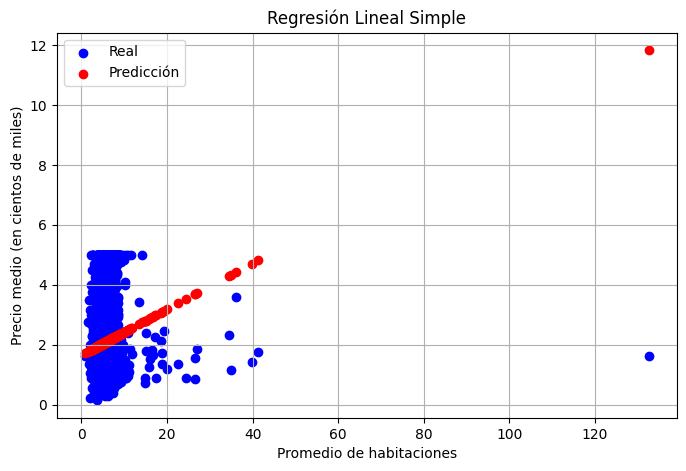

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Error absoluto medio en test: 0.34
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


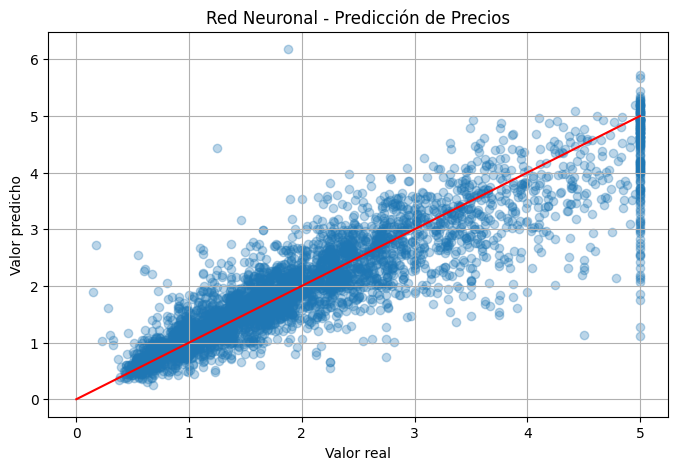


Ejemplo de estructura de control:
✅ Predicción precisa. Error: 0.04
❌ Predicción imprecisa. Error: 0.71
✅ Predicción precisa. Error: 0.19
✅ Predicción precisa. Error: 0.32
✅ Predicción precisa. Error: 0.04
✅ Predicción precisa. Error: 0.02
✅ Predicción precisa. Error: 0.30
✅ Predicción precisa. Error: 0.03
❌ Predicción imprecisa. Error: 1.04
✅ Predicción precisa. Error: 0.16

Errores individuales: [np.float32(0.038360298), np.float32(0.71154445), np.float32(0.18799782), np.float32(0.31535912), np.float32(0.04043126), np.float32(0.024347067), np.float32(0.30260932), np.float32(0.034794927), np.float32(1.0409846), np.float32(0.15539455)]
Promedio de error en muestra: 0.28518233


In [1]:
# ===============================
# 1. Importar librerías necesarias
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# ===============================
# 2. Cargar dataset de viviendas
# ===============================
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedHouseValue")

print("Primeras filas del dataset:")
print(X.head())

# ===============================
# 3. Regresión lineal simple
# ===============================
X_room = X[["AveRooms"]]  # variable independiente
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_room, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train_r, y_train_r)
y_pred_lr = lr_model.predict(X_test_r)

# ===============================
# 4. Graficar predicción lineal
# ===============================
plt.figure(figsize=(8, 5))
plt.scatter(X_test_r, y_test_r, color='blue', label="Real")
plt.scatter(X_test_r, y_pred_lr, color='red', label="Predicción")
plt.xlabel("Promedio de habitaciones")
plt.ylabel("Precio medio (en cientos de miles)")
plt.title("Regresión Lineal Simple")
plt.legend()
plt.grid(True)
plt.show()

# ===============================
# 5. Red neuronal con múltiples variables
# ===============================
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nn)
X_test_scaled = scaler.transform(X_test_nn)

# Definición de la red neuronal
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Salida
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenamiento del modelo
history = model.fit(X_train_scaled, y_train_nn, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluación
loss, mae = model.evaluate(X_test_scaled, y_test_nn, verbose=0)
print(f"Error absoluto medio en test: {mae:.2f}")

# Predicción
y_pred_nn = model.predict(X_test_scaled).flatten()

# ===============================
# 6. Graficar resultados de red neuronal
# ===============================
plt.figure(figsize=(8, 5))
plt.scatter(y_test_nn, y_pred_nn, alpha=0.3)
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")
plt.title("Red Neuronal - Predicción de Precios")
plt.grid(True)
plt.plot([0, 5], [0, 5], color="red")  # línea perfecta
plt.show()

# ===============================
# 7. Estructuras de control (ejemplo)
# ===============================
print("\nEjemplo de estructura de control:")
errores = []

for pred, real in zip(y_pred_nn[:10], y_test_nn[:10]):
    error = abs(pred - real)
    errores.append(error)
    if error < 0.5:
        print(f"✅ Predicción precisa. Error: {error:.2f}")
    else:
        print(f"❌ Predicción imprecisa. Error: {error:.2f}")

# Estructura de datos: lista de errores
print("\nErrores individuales:", errores)
print("Promedio de error en muestra:", np.mean(errores))
